In [9]:
import numpy as np
import pandas as pd
import matplotlib as mtl
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib



In [10]:
root_dir = os.getcwd()
print (os.getcwd()) # cwd = current working directory

C:\Users\aksil\DataScience_IA


In [11]:
dataset_dir = os.path.join(root_dir,"Datasets")
print(dataset_dir)

C:\Users\aksil\DataScience_IA\Datasets


In [12]:
dataset = "IRIS_ Flower_Dataset.csv"
df = pd.read_csv(os.path.join(dataset_dir,dataset))


In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
print(df.head())

print(df['species'].value_counts())

print(df.isnull().sum())

print(df.describe())



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000

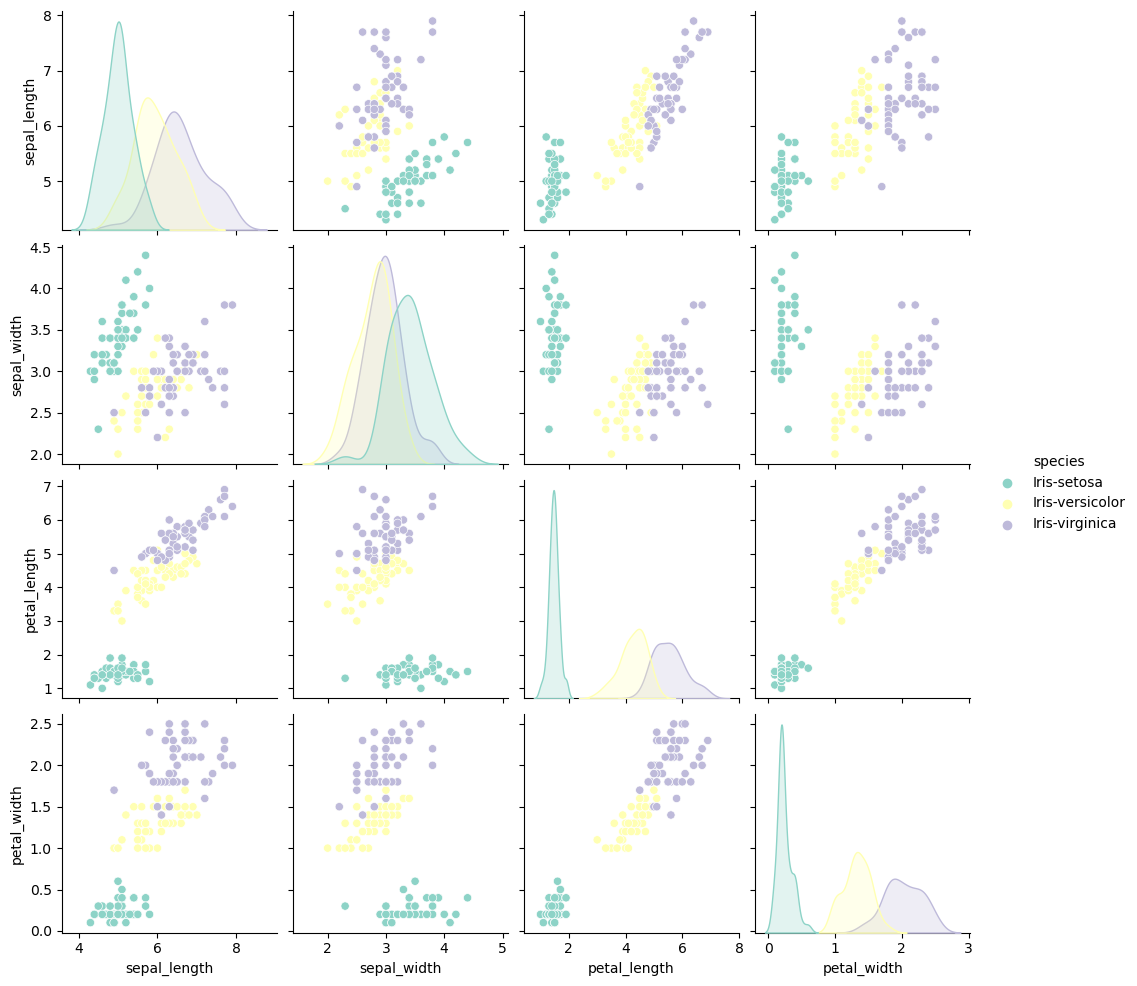

In [15]:
sns.pairplot(df, hue="species", palette="Set3")

In [16]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [18]:
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(svm_report)

SVM Accuracy: 1.0
SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'C': 1, 'gamma': 0.1}
Best Score: 0.9500000000000001


In [20]:
joblib.dump(svm_model, 'flower_classification_model.pkl')


['flower_classification_model.pkl']

['flower_classification_model.pkl']